In [8]:
# 0. Load the dataset

import pandas as pd

# Load the dataset file
file_path = '../data/raw/Coffee_Shop_Sales.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset to understand its structure
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
 11  Revenue           149116 non-null  object 
 12  Month             149116 non-null  int64  
 13  Month.1           149116 non-null  object 
 14  Weekday           149116 non-null  int64  
 15  Weekday.1         149116 non-null  object 
 16  Hour              14

(None,
    transaction_id transaction_date transaction_time  transaction_qty  \
 0               1         2023/1/1          7:06:11                2   
 1               2         2023/1/1          7:08:56                2   
 2               3         2023/1/1          7:14:04                2   
 3               4         2023/1/1          7:20:24                1   
 4               5         2023/1/1          7:22:41                2   
 
    store_id   store_location  product_id  unit_price    product_category  \
 0         5  Lower Manhattan          32         3.0              Coffee   
 1         5  Lower Manhattan          57         3.1                 Tea   
 2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
 3         5  Lower Manhattan          22         2.0              Coffee   
 4         5  Lower Manhattan          57         3.1                 Tea   
 
             product_type               product_detail Revenue  Month Month.1  \
 0  Gour

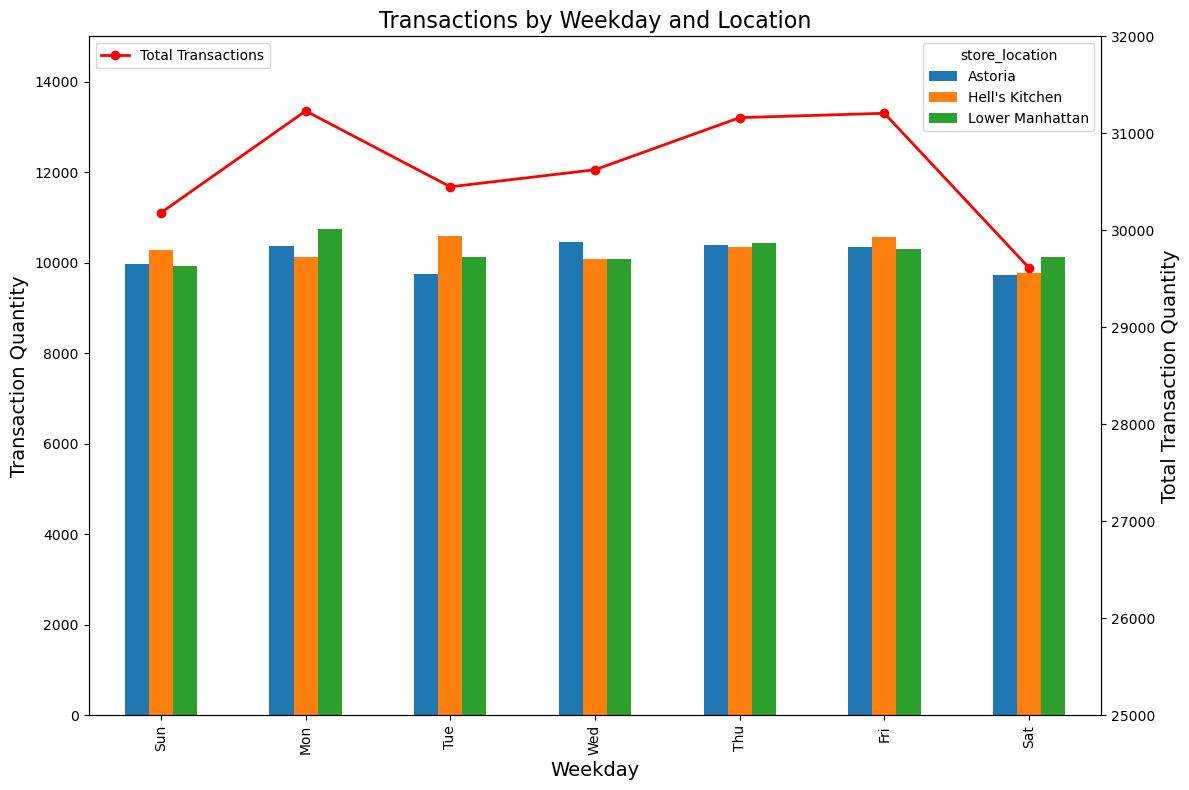

In [9]:
# 1. Dual-Axis Plot
# Transactions by Weekday and Location

import matplotlib.pyplot as plt

# Summarize transaction quantities by weekday and location
grouped_data = df.groupby(['Weekday.1', 'store_location'])['transaction_qty'].sum().unstack()

# Sort the index (Weekday) to be in the correct order
grouped_data = grouped_data.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Calculate the total transaction quantities across all locations
grouped_data['Total'] = grouped_data.sum(axis=1)

# Create a bar plot for each location with a dual-axis line plot for total transactions
fig, ax1 = plt.subplots(figsize=(12, 8))

grouped_data.iloc[:, :-1].plot(kind='bar', ax=ax1)

# ax1.set_ylim(0, grouped_data.iloc[:, :-1].max().max() * 1.2)  # Adjust y-limit to lower the bars
ax1.set_ylim(0, 15000)  # Set the y-axis limits for the bars (0 to 12000)

ax1.set_xlabel('Weekday', fontsize=14)
ax1.set_ylabel('Transaction Quantity', fontsize=14)

# Create a secondary y-axis for the total transaction quantities
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['Total'], color='red', marker='o', linestyle='-', linewidth=2, label='Total Transactions')

# ax2.set_ylim(0, grouped_data['Total'].max() * 1.3)  # Adjust y-limit to raise the line
ax2.set_ylim(25000, 32000)  # Set the y-axis limits for the line (25000 to 32000)

ax2.set_ylabel('Total Transaction Quantity', fontsize=14)
ax2.legend(loc='upper left')

# Add titles and labels
plt.title('Transactions by Weekday and Location', fontsize=16)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

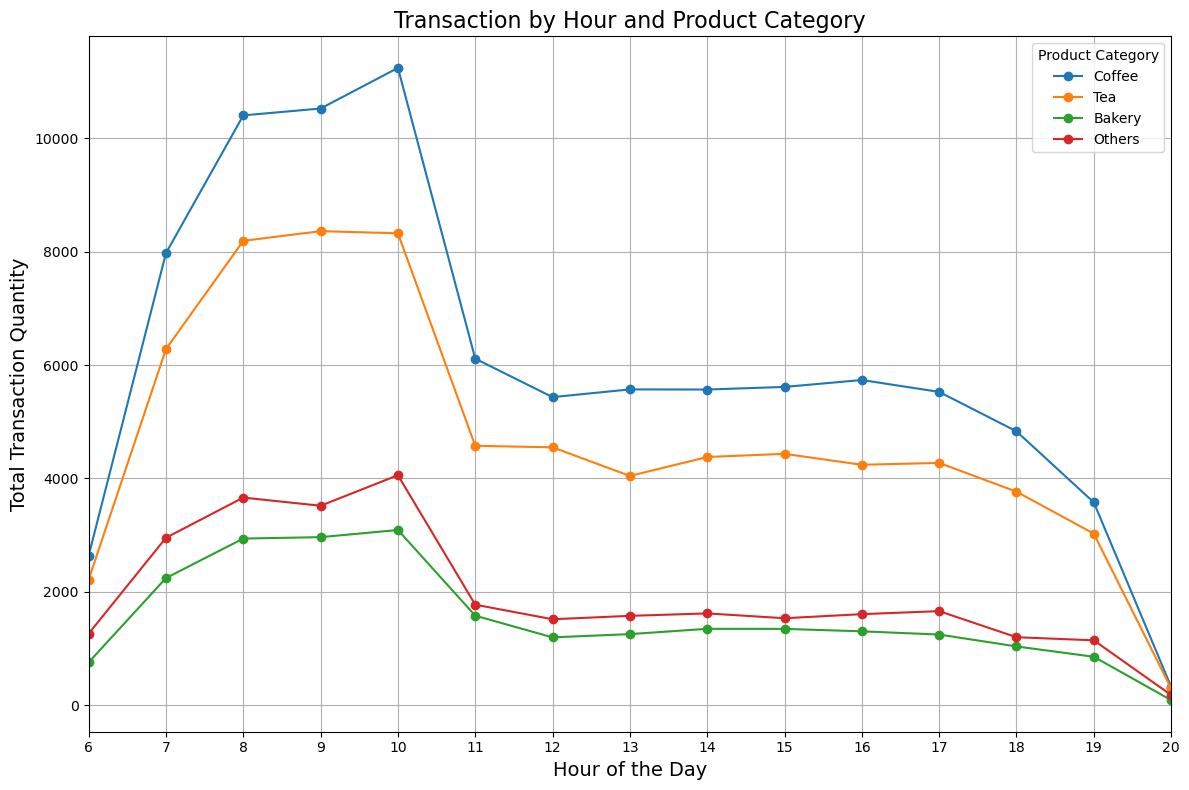

In [10]:
# 2. Line Plot with Multiple Lines
# Transaction by Hour and Product Category

import matplotlib.pyplot as plt

# Read the data (assuming it's already loaded into a DataFrame named `df`)
# df = pd.read_csv('/mnt/data/Coffee_Shop_Sales_S.csv')

# Grouping the product categories into Coffee, Tea, Bakery, and Others
df['product_category_group'] = df['product_category'].apply(lambda x: 
                                                             'Coffee' if 'Coffee' in x else
                                                             'Tea' if 'Tea' in x else
                                                             'Bakery' if 'Bakery' in x else
                                                             'Others')

# Summarize transaction quantities by hour and product category group
grouped_hourly_data = df.groupby(['Hour', 'product_category_group'])['transaction_qty'].sum().unstack()

# Plotting the line plot for each product category group
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))

for category in ['Coffee', 'Tea', 'Bakery', 'Others']:
    plt.plot(grouped_hourly_data.index, grouped_hourly_data[category], marker='o', label=category)

# Add titles and labels
plt.title('Transaction by Hour and Product Category', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Transaction Quantity', fontsize=14)
plt.xticks(range(6, 21))  # Setting x-ticks from 6 to 20
plt.xlim(6, 20)  # Adjusting the x-axis limits to 6 to 20
plt.legend(title='Product Category')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

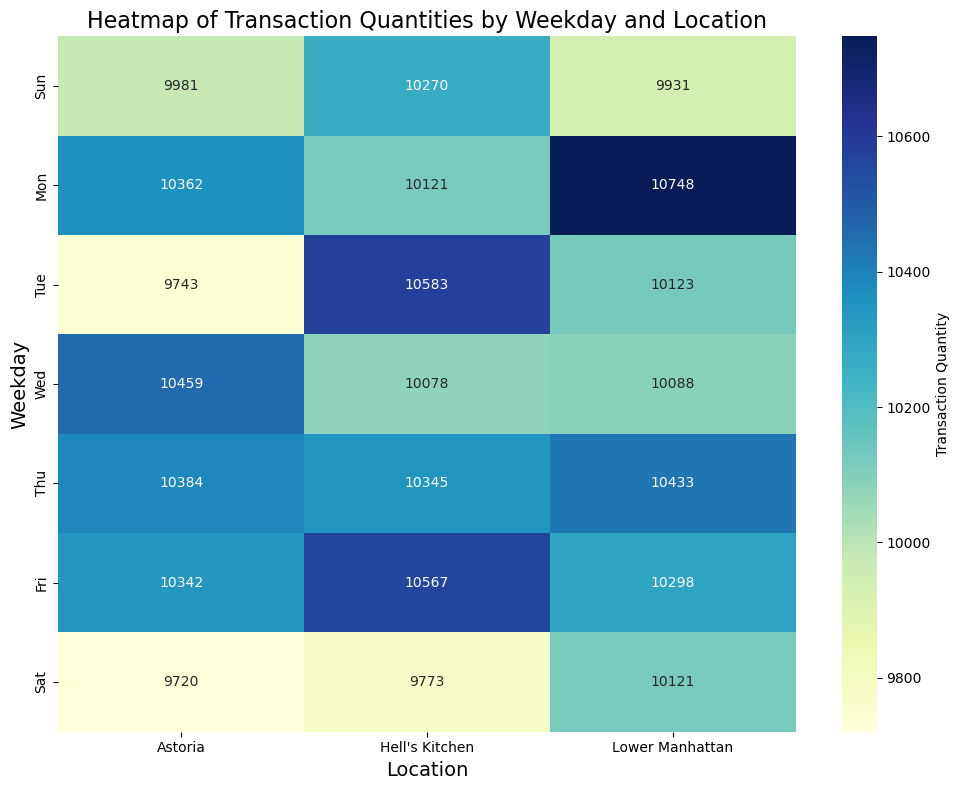

In [11]:
# 3. Heatmap
# This is an experimental plot to see how Heatmap looks like.
# It looks not very clear on the purpose of showing transactions by weekdays

import seaborn as sns
import matplotlib.pyplot as plt

# Summarize transaction quantities by weekday and location
grouped_data = df.groupby(['Weekday.1', 'store_location'])['transaction_qty'].sum().unstack()

# Sort the index (Weekday) to be in the correct order
grouped_data = grouped_data.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Transaction Quantity'}, fmt='g')

# Add titles and labels
plt.title('Heatmap of Transaction Quantities by Weekday and Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Weekday', fontsize=14)

plt.tight_layout()
plt.show()